In [1]:
#nvidia_smi.exe  看GPU 的狀況
#iris_dataset 3d
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
import os
print("import done")

Using TensorFlow backend.


import done


![title](img/iris.png)

![title](iris-machinelearning.png)

Part One 資料處理
1. 讀入資料(dictionary 型態，六個 Key)
2. 轉成 dataframe(pandas)
3. 轉成 array(numpy)
4. 分割成訓練與測試兩個dataset

Part Two 深度學習
1. 神經網路架構設計(查看網路架構參數個數)
2. 神經網路翻譯(設定optimizer方法)
3. 神經網路訓練(印出預測錯誤函數與準確函數曲線圖)
4. 神經網路驗證(用測試資料驗證準確率)
5. 神經網路預測(使用全新資料做預測)


In [2]:
#輸入資料集，資料集以 dict 字典資料型態儲存
iris_dataset = datasets.load_iris()

print("data load done")

data load done


In [3]:
#印出資料集 字典型態的 Key，資料值
print(iris_dataset.keys())
for key in iris_dataset.keys():
    print("key :",key ,iris_dataset[key])

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
key : data [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.

<img src="./iris-machinelearning.png",width=1200,height=600>

In [4]:
#sepal length (cm) 萼片長度
#sepal width (cm) 萼片寬度
#petal length (cm) 花瓣長度
#petal width (cm) 花瓣寬度
#setosa 山鳶尾
#versicolor 變色鳶尾
#virginica 維吉尼亞鳶尾
#從 字典資料集 轉成 pandas dataframe
df = pd.DataFrame(iris_dataset["data"],
                  columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"])
# df.head(10)
df.tail(7)


,sepal_length,sepal_width,petal_length,petal_width
143,6.8,3.2,5.9,2.3
144,6.7,3.3,5.7,2.5
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [7]:
#將字典資料集的標準答案轉成 Numpy Array
target = iris_dataset["target"]
print(target)
print(type(target))
print(target)
# 將dataframe 資料集 增加一個標準答案數字的欄位
df["target"] = target
df

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
# print(iris_dataset["target_names"][df["target"]])
# 將dataframe 資料集 增加一個標準答案英文名稱的欄位
df["target_names"] = iris_dataset["target_names"][df["target"]]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
# df.to_csv("./df_iris.csv"), 
# df.tocsv("df_iris.csv",index = false), no index
# df = pd.read_csv("./iris_dataset.csv")

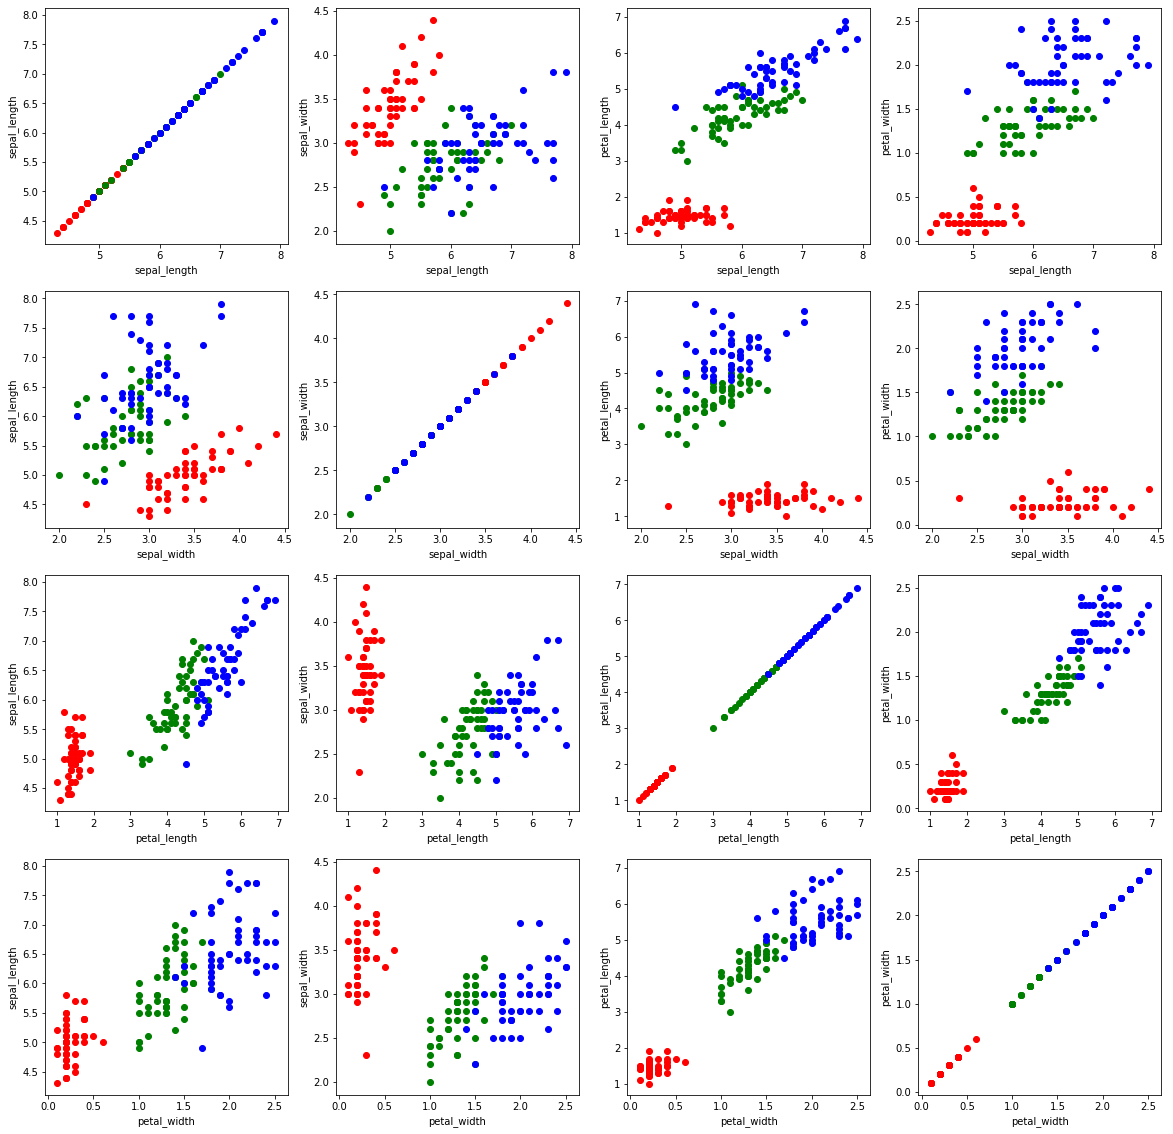

In [9]:
#資料集有四個特徵欄位(花萼長、寬， 花瓣長、寬)，
#任選兩個欄位畫出資料分布狀況，藉以觀察那些欄位特徵對分類特別有幫助。
#不同類別使用不同顏色區分
color = ["red", "green", "blue"]

plt.figure(figsize=(20,20))
# plt.subplots_adjust(wspace = 0.2, hspace = 0.2)
for i in range(4*4):
    plt.subplot(4, 4, i+1)
    plt.xlabel(df.columns[i//4]) # 選用一個特徵欄位作為 X軸
    plt.ylabel(df.columns[i%4])   # 選用一個特徵欄位作為 Y軸
    for j in range(len(iris_dataset["target_names"])):
        plt.scatter(df.iloc[:,i//4][df.target == j],
                    df.iloc[:,i%4][df.target == j],
                    c = color[j])
    
plt.show()
    

In [ ]:
#Max Normalize!!

In [10]:
nor_df = df.copy()   # nor_df = df
print(nor_df.columns[:4])
#print(nor_df.columns["sepal_length"])
for col in nor_df.columns[:4]:
    print(col, "max valus :", df[col].max()) # 將來test 時，正規化需要max的值
    nor_df[col] = nor_df[col] / df[col].max()
    
nor_df

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
sepal_length max valus : 7.9
sepal_width max valus : 4.4
petal_length max valus : 6.9
petal_width max valus : 2.5


,sepal_length,sepal_width,petal_length,petal_width,target,target_names
0,0.645570,0.795455,0.202899,0.08,0,setosa
1,0.620253,0.681818,0.202899,0.08,0,setosa
2,0.594937,0.727273,0.188406,0.08,0,setosa
3,0.582278,0.704545,0.217391,0.08,0,setosa
4,0.632911,0.818182,0.202899,0.08,0,setosa
...,...,...,...,...,...,...
145,0.848101,0.681818,0.753623,0.92,2,virginica
146,0.797468,0.568182,0.724638,0.76,2,virginica
147,0.822785,0.681818,0.753623,0.80,2,virginica
148,0.784810,0.772727,0.782609,0.92,2,virginica


In [11]:
data_x = nor_df.iloc[0:150, :4].values # data frame --> numpy array
data_y = nor_df.iloc[0:150, 4].values
print(data_x.shape)
print(data_y.shape)
print(data_y)
print(data_x)

(150, 4)
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[0.64556962 0.79545455 0.20289855 0.08      ]
 [0.62025316 0.68181818 0.20289855 0.08      ]
 [0.59493671 0.72727273 0.1884058  0.08      ]
 [0.58227848 0.70454545 0.2173913  0.08      ]
 [0.63291139 0.81818182 0.20289855 0.08      ]
 [0.6835443  0.88636364 0.24637681 0.16      ]
 [0.58227848 0.77272727 0.20289855 0.12      ]
 [0.63291139 0.77272727 0.2173913  0.08      ]
 [0.55696203 0.65909091 0.20289855 0.08      ]
 [0.62025316 0.70454545 0.2173913  0.04      ]
 [0.6835443  0.84090909 0.2173913  0.08      ]
 [0.60759494 0.77272727 0.23188406 0.08      ]
 [0.60759494 0.68181818 0.20289855 0.04      ]
 [0.5443038  0.68181818 0.15942029 0.04      ]
 [0.73417722 0.90909

In [12]:
#data_y one_hot_encoding!!
#print(np.eye(len(iris_dataset["target_names"])))
# 標準答案轉成 one hot encoding
data_y = np.eye(len(iris_dataset["target_names"]))[data_y]
data_y.shape

#data_y

(150, 3)

In [13]:
print(data_y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [14]:
#設定分類的類別數
# num_classes = 3
num_classes = len(iris_dataset["target_names"])
print(num_classes)

3


In [15]:
#分割資料集 75% 為訓練資料集，%25 為測試資料集
# 0,1,2,3,4,5,6......149
# train 0,3,4,5 ....
# test  1,2,6.....
x_train, x_test, y_train, y_test = train_test_split(data_x,
                                            data_y,
                                            test_size=0.25,
                                            random_state  = 1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(112, 4)
(38, 4)
(112, 3)
(38, 3)


In [ ]:
# iris_dataset  --> df --> nor_df--> data_x--> x_tarin, y_train

In [16]:
# input_shape = 4
input_shape = data_x.shape[1:]
print(input_shape)

(4,)


![title](sigmoid.png)

![title](softmax.png)

![title](softmax-2.png)

In [17]:
#建立訓練模型
model = Sequential()
#第一層32個神經元，輸入資料型態  (4,)  四個欄位
model.add(Dense(32, input_shape = data_x.shape[1:])) #tuple, (150,4)  第二個屬性 :4 --> (4,)
#model.add(Dense(32, input_shape = (4,)))
model.add(Activation('sigmoid')) # 激活函數

model.add(Dense(64)) # 第二層 64 個神經元
model.add(Activation('sigmoid')) # 激活函數

model.add(Dense(64)) # 第三層 64 個神經元
model.add(Activation('sigmoid'))# 激活函數

#========================output========================
model.add(Dense(num_classes)) # 輸出層 3 個神經元
model.add(Activation('softmax'))# 激活函數
  
print(model.summary()) #印出權重參數量

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                160       
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
activation_3 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                

![title](adam.png)

![title](opt.gif)

In [18]:
#設定梯度下降最佳化方法
opt = Adam()
# 翻譯模型，設定 Loss function， 最佳化方法， 模型好壞判斷標準
model.compile(loss='categorical_crossentropy',
              optimizer=opt, metrics=['accuracy'])
print("compile done")

compile done


In [19]:
#設定 儲存訓練模型 目錄
save_dir = os.path.join(os.getcwd(), 'saved_models')  #"c:/dnn/iris/saved_models"
epochs = 5
steps_per_epoch = 100  #每回合 100步
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
print("done")

done


In [20]:
#設定檢查點 以 loss value 為依據，若這一回合 loss Value 下降，則儲存新模型。
#儲存模型以第幾回合，準確率為模型檔名。
checkpoint = ModelCheckpoint("./saved_models/weight_epochs_{epoch:02d}_val_acc_{val_accuracy:.02f}.h5",
                             monitor='val_loss', save_best_only=True, verbose=1)
# 設定提早結束條件，若是 五回合 Loss Value 都沒下降，則提早結束訓練:earlystop
earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# model.fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None)
# 訓練模型
model_history = model.fit(x = x_train, y = y_train,  # 輸入訓練資料與標準答案
          epochs=epochs,   # 設定訓練回合數
          steps_per_epoch = steps_per_epoch,  #設定每回合有幾個 steps (batch)
          validation_data=(x_test, y_test),   #設定 驗證資料集來源為 測試資料集
          validation_steps = 100,             #....
          callbacks=[earlystop, checkpoint],  #設定 啟動 earlystop, checkpoint
          verbose=1)                          #設定輸出訓練過程訊息的方式



Train on 112 samples, validate on 38 samples
Epoch 1/5
100/100 [==============================] - 1s 10ms/step - loss: 1.0733 - accuracy: 0.4572 - val_loss: 0.0102 - val_accuracy: 57.8947

Epoch 00001: val_loss improved from inf to 0.01022, saving model to ./saved_models/weight_epochs_01_val_acc_57.89.h5
Epoch 2/5
100/100 [==============================] - 1s 6ms/step - loss: 0.6198 - accuracy: 0.8031 - val_loss: 0.0032 - val_accuracy: 97.3684

Epoch 00002: val_loss improved from 0.01022 to 0.00318, saving model to ./saved_models/weight_epochs_02_val_acc_97.37.h5
Epoch 3/5
100/100 [==============================] - 1s 7ms/step - loss: 0.2072 - accuracy: 0.9558 - val_loss: 0.0011 - val_accuracy: 97.3684

Epoch 00003: val_loss improved from 0.00318 to 0.00109, saving model to ./saved_models/weight_epochs_03_val_acc_97.37.h5
Epoch 4/5
100/100 [==============================] - 1s 6ms/step - loss: 0.1039 - accuracy: 0.9657 - val_loss: 5.4710e-04 - val_accuracy: 97.3684

Epoch 00004: val_lo

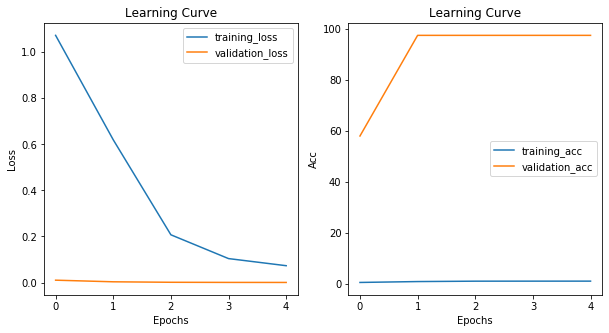

In [21]:
# 劃出 準確率與 Loss Value 函數曲線
plt.figure(figsize=(10,5)) #預設 10x5 英吋
plt.subplot(121) # 一個 row 兩個 column， 第一個子圖畫在第一個位置
training_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.plot(training_loss, label="training_loss") #劃出 訓練的 Loss 曲線
plt.plot(val_loss, label="validation_loss")    #劃出 驗證的 Loss 曲線
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend(loc='best')


plt.subplot(122) # 一個 row 兩個 column， 第一個子圖畫在第二個位置
training_acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

plt.plot(training_acc, label="training_acc") #劃出 訓練的 準確率 曲線
plt.plot(val_acc, label="validation_acc")   #劃出 驗證的 準確率 曲線
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

In [24]:
from keras.models import load_model, Model

In [25]:
#輸入訓練好的 model 注意模型的編號必須存在檔案裡
model = load_model("./saved_models/weight_epochs_05_val_acc_97.37.h5")

In [26]:
#評估模型準確率
scores = model.evaluate(x_test, y_test, verbose = 1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

38/38 [==============================] - 0s 2ms/step
Test loss: 0.036462013364622466
Test accuracy: 0.9736841917037964


In [27]:
#進行預測
preds = model.predict_classes(data_x)  # 預測答案
ans = np.argmax(data_y, axis = 1)      # 標準答案
fail_preds = np.where(ans!=preds)[0]   # 找出錯誤預測

#將錯誤預測做成 dataframe
wrong_df = pd.DataFrame(index = range(len(fail_preds)),
                        columns=["sepal_length", "sepal_width", "petal_length", "petal_width",
                                 "pred", "pred_name", "ans", "ans_name"])
# 整理錯誤預測 增加欄位
for i in range(len(fail_preds)):
    wrong_df.iloc[i, :4] = df.iloc[fail_preds[i]]
    wrong_df.loc[i, "pred"] = preds[fail_preds[i]]
    wrong_df.loc[i, "pred_name"] = iris_dataset["target_names"][preds[fail_preds[i]]]
    wrong_df.loc[i, "ans"] = ans[fail_preds[i]]
    wrong_df.loc[i, "ans_name"] = iris_dataset["target_names"][ans[fail_preds[i]]]
    
wrong_df

,sepal_length,sepal_width,petal_length,petal_width,pred,pred_name,ans,ans_name
0,5.9,3.2,4.8,1.8,2,virginica,1,versicolor
1,6.7,3,5,1.7,2,virginica,1,versicolor
2,6,2.7,5.1,1.6,2,virginica,1,versicolor
3,6.3,2.8,5.1,1.5,1,versicolor,2,virginica


In [28]:
# 印出錯誤預測個數
print(len(fail_preds), fail_preds )

4 [ 70  77  83 133]


In [29]:
#印出 錯誤預測位置 以 TRUE 表示
ans!=preds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [30]:
#印出150個預測值
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [31]:
#印出150個標準答案
ans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

![title](wrong_pred.png)

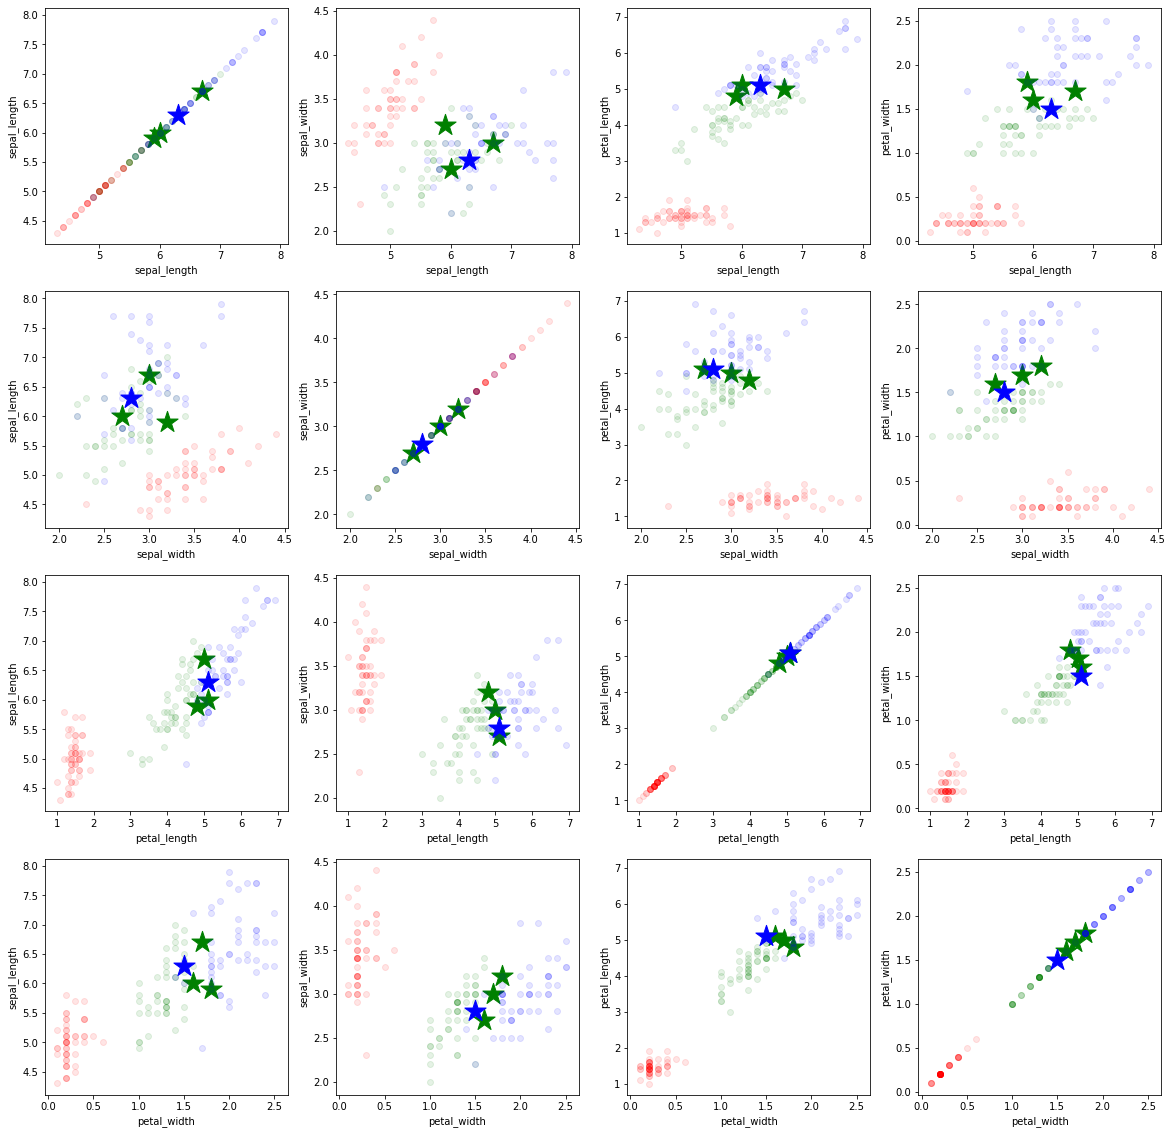

In [32]:
#任選兩個特徵欄位 印出錯誤資料分布
color = ["red", "green", "blue"]
plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace = 0.2, hspace = 0.2)
for i in range(4*4): #印出 4x4 個子圖
    plt.subplot(4, 4, i+1)  #印出 第 i+1子圖
    plt.xlabel(df.columns[i//4])  # X 軸 標示
    plt.ylabel(df.columns[i%4])   # Y軸 標示
    for j in range(len(iris_dataset["target_names"])):
        plt.scatter(df.iloc[:,i//4][df.target == j], df.iloc[:,i%4][df.target == j],
                    c = color[j], alpha = 0.1)  # 劃出 散布圖
        
        if len(wrong_df.query("ans == " + str(j)).index) != 0:
            plt.scatter(wrong_df.iloc[:,i//4][wrong_df.ans == j],
                        wrong_df.iloc[:,i%4][wrong_df.ans == j],
                        c = color[j], marker = "*", s = 500)  #錯誤資料 以大顆(size = 500) * 表示
    
plt.show()
    